In [94]:
import numpy as np

In [95]:
import numpy as np
import matplotlib.pyplot as plt

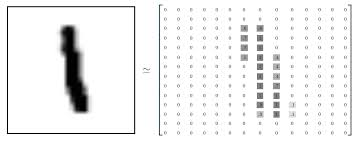
Numbric representation of image

In [96]:
costs = []

#Extract and prepare MNIST training data
def LoadMNISTSets(fileimage, n):
    fimg = open(fileimage, "rb")

    fimg.read(16) # Read 16 bytes
    number_of_pix = 28*28 # image pixel
    s = (n,number_of_pix)
    image_sets = np.zeros(s)

    for i in range(n):
        for j in range(number_of_pix):
            pix = ord(fimg.read(1))
            image_sets[i,j] = normalize(pix)

    fimg.close()
    return image_sets

In [97]:
#Extract and prepare MNIST test data
def LoadMNISTLabel(filelabel, n):
    flabel = open(filelabel, "rb")

    flabel.read(8) # Read 8 bytes
    s = (n,10)
    label_sets = np.zeros(s, dtype=int)

    for i in range(n):
        label = ord(flabel.read(1))
        label_sets[i,label] = 1

    flabel.close()
    return label_sets

In [98]:
# Read the image with the help of openCV
# assigning the label according to folder
# import cv2
# import os

# def load_images_from_folder(folder,n):
#     images = []
#     label = np.zeros((n,10),dtype=int)
#     i=0
#     for folders in os.listdir(folder):
#         for filename in os.listdir(folders):
#             img = cv2.imread(os.path.join(folder,filename))
#             images.append(img)
#             label[i,filename]=1
#             i++
#     return images,label

Normalization : normalization is to reduce data redundancy

In [99]:
#Normalization from [0..255] to [0..1] scale
def normalize(dataset):
    return dataset / 255

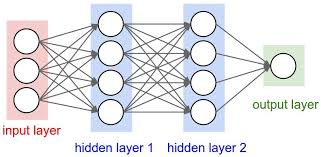


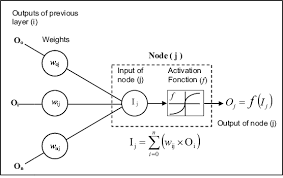

                   Activation function is used to develop the non linear relationship

In [100]:
#Assign initial weights and bias to each node in the layer
class initialization():
    def __init__(self, number_of_nodes, number_of_inputs):
        self.number_of_nodes = number_of_nodes
        self.number_of_inputs = number_of_inputs
        #initial weights using normal distribution
        self.weights = np.random.normal(-1.0, 1.0, size=(number_of_inputs, number_of_nodes)) 
        self.bias = np.random.normal(-1.0, 1.0, size=(1, number_of_nodes))

Different type of activation function
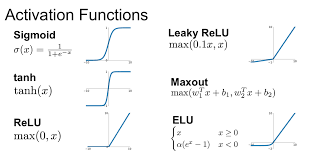

In [101]:
class NeuralNet():
    def __init__(self, layer1, layer2, layer3):
        self.layer1 = layer1
        self.layer2 = layer2
        self.layer3 = layer3
    
    # Softmax activation function
    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / np.sum(e_x)
    
    #sigmoid activation function
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x)) 

    # ReLU activation function
    def relu(self, x):
        return x * (x > 0)

    # Tanh activation function
    def tanh(self, x):
        return np.tanh(x)
    
    # cross Entropy loss
    def cross_entropy(self, labels, layer_output):
        # Cross Entropy loss
        return np.negative(np.sum(np.multiply(labels, np.log(layer_output))))

    def delta_cross_entropy(self, labels, layer_output):
        return (layer_output - 1) / labels.shape[0]
    
    def forward_pass(self, inputs):
        #Sum of dot product of each layer
        #Apply activation function to the layer sums

        #Pass the training sets through neural network
        layer_1 = np.dot(inputs, self.layer1.weights) + self.layer1.bias
        output_layer_1 = self.sigmoid(layer_1) #activation(1)

        layer_2 = np.dot(output_layer_1, self.layer2.weights) + self.layer2.bias
        output_layer_2 = self.relu(layer_2) #activation(2)
        
        layer_3 = np.dot(output_layer_2, self.layer3.weights) + self.layer3.bias 
        output_layer_3 = self.softmax(layer_3) #y_result

        return output_layer_1, output_layer_2, output_layer_3

    def backward_pass(self, learning_rate, labels, training_inputs, output_layer_1, output_layer_2, output_layer_3):
        targets = labels
        #use cross entropy
        #delta_layer3 = output_layer_3 - targets
        delta_layer3 = self.delta_cross_entropy(targets, output_layer_3)
        delta_layer2 = (delta_layer3).dot(self.layer3.weights.T) * output_layer_2 * (1 - output_layer_2)
        delta_layer1 = (delta_layer2).dot(self.layer2.weights.T) * output_layer_1 * (1 - output_layer_1)

        learning_rate_bias = 0.001

        #Adjust bias and weights
        self.layer3.weights -= learning_rate * output_layer_2.T.dot(delta_layer3)
        self.layer3.bias -= learning_rate_bias * (delta_layer3).sum(axis=0)

        self.layer2.weights -= learning_rate * output_layer_1.T.dot(delta_layer2)
        self.layer2.bias -= learning_rate_bias * (delta_layer2).sum(axis=0)

        self.layer1.weights -= learning_rate * training_inputs.T.dot(delta_layer1)
        self.layer1.bias -= learning_rate_bias * (delta_layer1).sum(axis=0)

        #print(learning_rate, delta_layer1)
        
    def train(self, batch_size, training_inputs, labels, n_epochs, learning_rate):
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        for j in range(n_epochs):
            i = 0
            if j%10==9:
                print(" EPOCH: ", j+1, "/", n_epochs)

            output_layer_1, output_layer_2, output_layer_3 = self.forward_pass(training_inputs)
            layer3_error = self.cross_entropy(labels, output_layer_3)
            self.backward_pass(learning_rate, labels, training_inputs, output_layer_1, output_layer_2, output_layer_3)

            error_result = layer3_error / len(output_layer_3)
            if j%10==9:
                print("\cross_entropy_loss: ", error_result)

            costs.append(error_result)

        
    def test_accuracy(self, test_inputs, test_outputs):
        output_layer_1, output_layer_2, output_layer_3 = self.forward_pass(test_inputs)
        number_of_instance = len(test_outputs)
        nearest_node = np.argmax(output_layer_3, axis=1)
        test_real_value = np.argmax(test_outputs, axis=1)
        correct = (nearest_node == test_real_value).sum()
        print(correct,number_of_instance)
        print ("Accuracy: ", correct*100/ number_of_instance,"%")
        

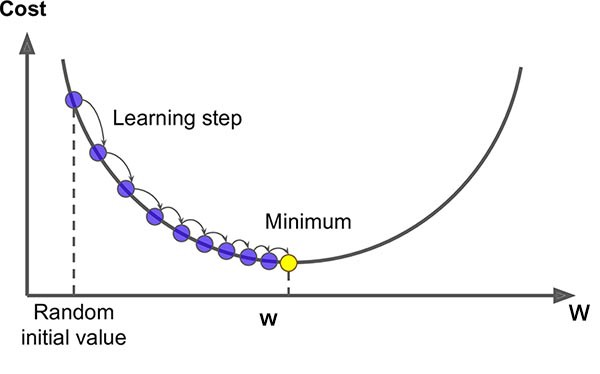

Training
 EPOCH:  10 / 100
\cross_entropy_loss:  18.599166149306285
 EPOCH:  20 / 100
\cross_entropy_loss:  19.169609313740622
 EPOCH:  30 / 100
\cross_entropy_loss:  19.648233494081143
 EPOCH:  40 / 100
\cross_entropy_loss:  19.925958143260765
 EPOCH:  50 / 100
\cross_entropy_loss:  19.92226398139215
 EPOCH:  60 / 100
\cross_entropy_loss:  19.624298442414062
 EPOCH:  70 / 100
\cross_entropy_loss:  19.120355401806847
 EPOCH:  80 / 100
\cross_entropy_loss:  18.548921051513787
 EPOCH:  90 / 100
\cross_entropy_loss:  18.01030439422386
 EPOCH:  100 / 100
\cross_entropy_loss:  17.544260908186434
Testing
1014 10000
Accuracy:  10.14 %


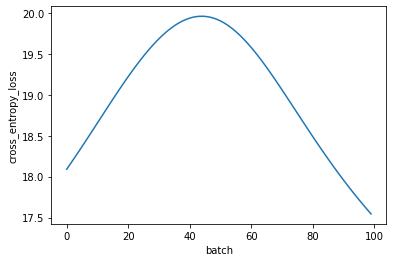

In [102]:
if __name__ == "__main__":



    print("Training")
    #Seed random generator
    np.random.seed(1)
    
    #Initialize number of nodes of each layer
    number_of_inputs_node = 28*28
    number_of_layer1_node = 256
    number_of_layer2_node = 64
    number_of_outputs_node = 10

    #Create layers of neural network
    layer1 = initialization(number_of_layer1_node, number_of_inputs_node)
    layer2 = initialization(number_of_layer2_node, number_of_layer1_node)
    layer3 = initialization(number_of_outputs_node, number_of_layer2_node)

    #Combine each layer into a neural network
    neural_network = NeuralNet(layer1,layer2,layer3)


    #Define number of training data
    n_training = 60000
    #Load training sets
    training_inputs = LoadMNISTSets("train-images.idx3-ubyte", n_training)
    training_outputs = LoadMNISTLabel("train-labels.idx1-ubyte", n_training)

    #Train the network using training sets
    neural_network.train(1, training_inputs, training_outputs, n_epochs=100, learning_rate=0.01)



    print("Testing")
    #Define number of test data
    n_test = 10000
    #Load test data
    test_inputs = LoadMNISTSets("train-images.idx3-ubyte", n_test)
    test_outputs = LoadMNISTLabel("train-labels.idx1-ubyte", n_test)

    #Test and check accuracy of the neural network
    neural_network.test_accuracy(test_inputs, test_outputs)

    plt.plot(costs)
    plt.xlabel('batch')
    plt.ylabel('cross_entropy_loss')
    plt.show()